We solve for SHM using Euler's Method. 
$$ \frac{d^2x}{dt^2} = -\frac{k}{m}x  = -\frac{x}{\tau^2} $$
$$ x(0)= 1 , \dot{x}(0) = 0$$

In [2]:
import numpy as np, matplotlib.pyplot as plt

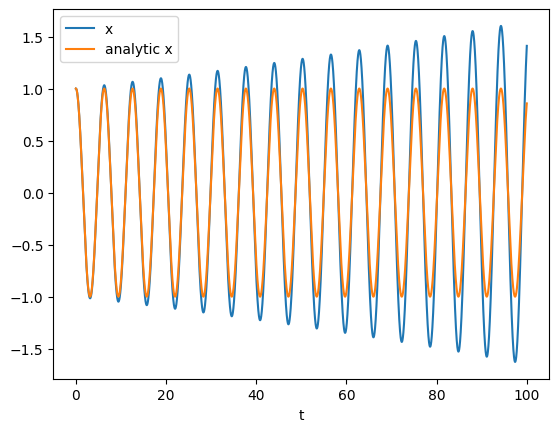

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


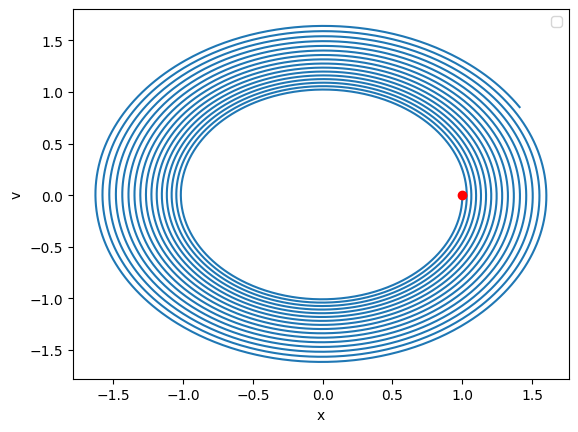

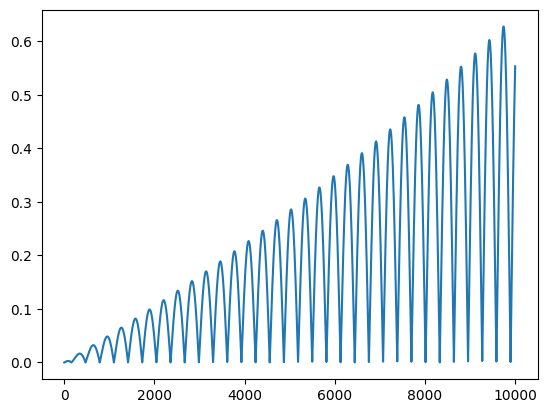

In [16]:

k = 1 
m = 1
x0 = 1 # initial positon
v0 = 0 # initial velocity

tau = np.sqrt(k/m)  # time scale of the problem =1/omega
omega = 1/tau

dt  = tau/100 # grid size
T = 100*tau # domain size
t = np.arange(0, T , dt)

x = np.zeros(len(t))
x[0] = x0
v = np.zeros(len(t))
v[0] = v0

###EUler 
for i in range(len(t)-1):
    dxdt = v[i]
    x[i+1] = x[i] + dxdt*dt

    dvdt = -x[i]/tau**2
    v[i+1] = v[i] + dvdt*dt # euler's method

def analytic(t):
    return x0*np.cos(omega*t)

# print(x)

plt.plot(t,x,label = 'x')
# plt.plot(t,v,label = 'v')
plt.plot(t,analytic(t),label='analytic x')
plt.xlabel('t')
plt.legend()
plt.show()

plt.plot(x,v)
plt.plot(x[0],v[0],'ro')
plt.xlabel('x')
plt.ylabel('v')
plt.legend()
plt.show()

error = np.abs(x-analytic(t))
plt.plot(error,label='abs error')

To show that error is linear with time we need to show that for differnet values of step size the error the error at the final step (i.e the global error) of calcuation varies linearly with $\Delta t$.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


T: 100.0
intial grid size: 0.01
change in grid size: 9.99999999999994e-05
length of x array: 100
Length of grid size array: 100
x[T] analytic: 0.8623188722876839
x[T] numerical for differnet grid size: [1.41036069 1.4173709  1.4249369  1.43358818 1.44385437 1.44707914
 1.45276119 1.46149412 1.47383231 1.48061948 1.48202333 1.4983327
 1.50006753 1.50760827 1.51112406 1.52150591 1.5285934  1.54353713
 1.54493548 1.55496141 1.56296284 1.56919656 1.57390915 1.5892216
 1.59189547 1.59381845 1.60772797 1.62177663 1.62371513 1.62606902
 1.64225441 1.64668057 1.65250996 1.66008741 1.66975309 1.68183308
 1.68260039 1.70040656 1.70727355 1.71761366 1.7170411  1.7353081
 1.74305722 1.75541082 1.75736081 1.76433008 1.77676293 1.77898821
 1.78712991 1.80162997 1.80620501 1.81760946 1.81914102 1.82802601
 1.84472512 1.85190645 1.86737409 1.8735069  1.88842912 1.89417917
 1.89047126 1.91530436 1.91208284 1.91888297 1.93633136 1.9449357
 1.96468393 1.97584027 1.97831831 1.99262064 1.99841017 1.9954138

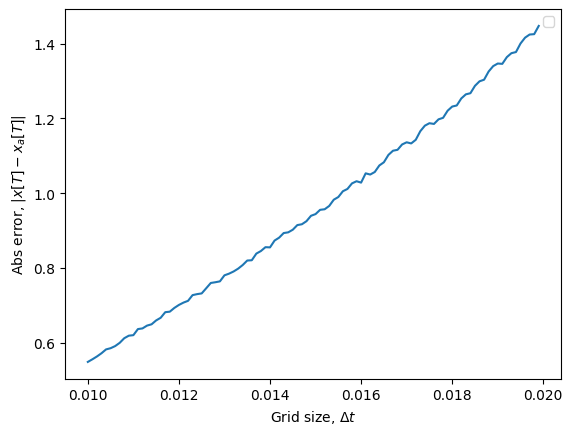

In [56]:
k = 1 
m = 1


tau = np.sqrt(k/m)  # time scale of the problem =1/omega
omega = 1/tau
T = 100*tau # domain size
x0 = 1 # initial positon
v0 = 0 # initial velocity
N=100 # numer of differnt grid sizes we will use

# We will only store the final postion of paritcle in the x array
# for differnt grid sizes.

x = np.zeros(N) # array to store final pos after t=T
dtt = np.zeros(N) # array to store grid  size

for i in range(N):
    dt = (0.01*i+1)*tau/100 # grid size reduces with each iteration.
    dtt[i] = dt
    t = np.arange(0, T , dt) # grid for current grid size.
    
    #local variables for use inside loop
    xi = x0 # initial positon
    vi = v0 # initial velocity
    
    ###EUler 
    for j in range(len(t)-1):
        dxdt = vi
        x1 = xi + dxdt*dt

        dvdt = -xi/tau**2
        v1 = vi + dvdt*dt # euler's method

        # update the initial values
        xi = x1 
        vi = v1

    # fore each value of grid size store the final location of particle
    x[i]=xi





print('T:',T)
def analytic(t):
    return x0*np.cos(omega*t)

print('intial grid size:',dtt[0])
print('change in grid size:',dtt[1]-dtt[0])
error = np.abs(x - analytic(T))
print('length of x array:',len(x))
print('Length of grid size array:',len(dtt))

print('x[T] analytic:',analytic(T))
print('x[T] numerical for differnet grid size:',x)
print('Grid Size:',dtt)
print('Error at T for each grid size:',error)

#label='$\Delta \Delta t = $'+ str(round(dtt[1]-dtt[0],6))
plt.plot(dtt,error)
plt.xlabel('Grid size, $\Delta t$')
plt.ylabel('Abs error, $|x[T]-x_{a}[T]|$')
plt.legend()

# plt.plot()


Solving the above problem using Euler-Cromer Method. Which involves change in taylor approximation of velocity. Instead of defining $v(t+\Delta{t}) = v(t) + \frac{dv(t)}{dt}\Delta{t}$  we do $v(t+\Delta{t}) = v(t) + \frac{dv(t+\Delta(t))}{dt}\Delta{t}$ 

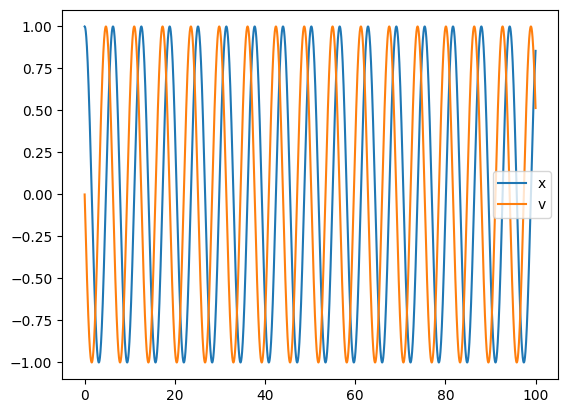

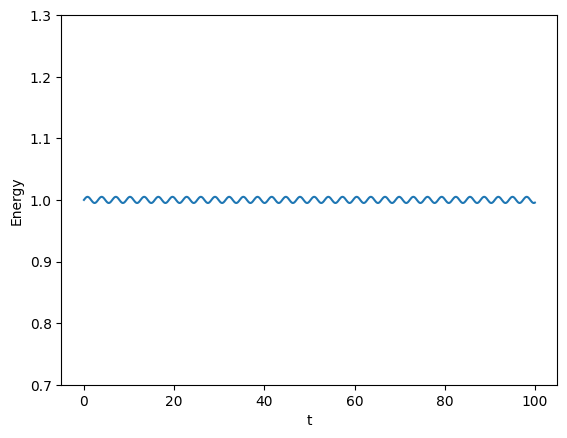

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


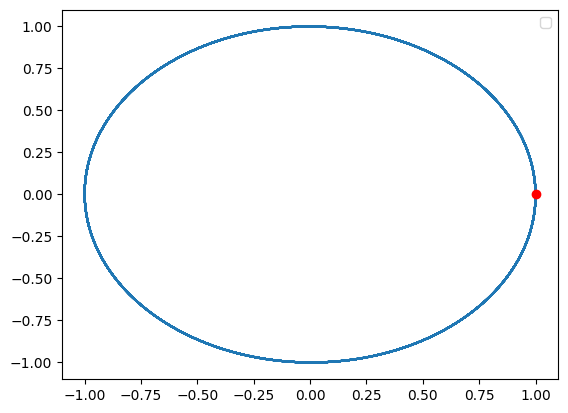

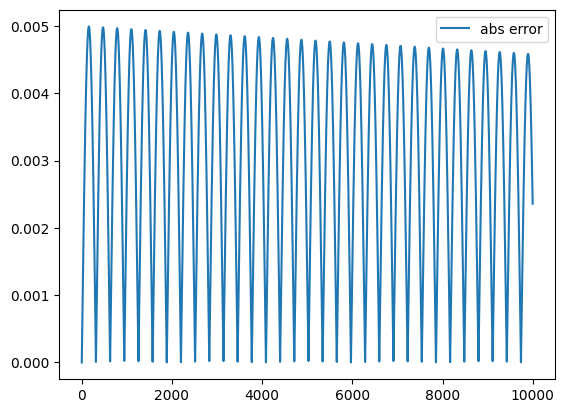

In [21]:
#Euler Cromer

k = 1 
m = 1
x0 = 1 # initial positon
v0 = 0 # initial velocity

tau = np.sqrt(k/m)  # time scale of the problem


dt  = tau/100 # grid size
T = 100*tau # domain size
t = np.arange(0, T , dt)

x = np.zeros(len(t))
x[0] = x0
v = np.zeros(len(t))
v[0] = v0


for i in range(len(t)-1):
    dxdt = v[i]
    x[i+1] = x[i] + dxdt*dt

    dvdt = -x[i+1]/tau**2 # using current time postion instead of previous
    v[i+1] = v[i] + dvdt*dt # euler's method

energy = k*x**2 + m*v**2
# print(x)

def analytic(t):
    return x0*np.cos(omega*t)

error = np.abs(x-analytic(t))

plt.plot(t,x,label = 'x')
plt.plot(t,v,label = 'v')
plt.legend()
plt.show()

plt.plot(t,energy)
plt.xlabel('t')
plt.ylabel('Energy')
plt.ylim(0.7,1.3)
plt.show()

plt.plot(x,v)
plt.plot(x[0],v[0],'ro')
plt.legend()
plt.show()

plt.plot(error,label='abs error')
plt.legend()
plt.show()




9th feb 2024
leapfrog

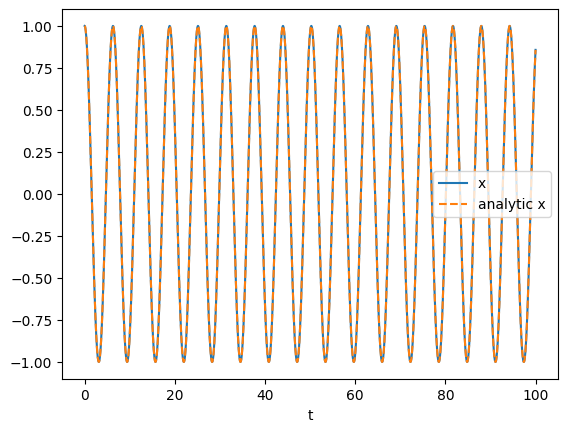

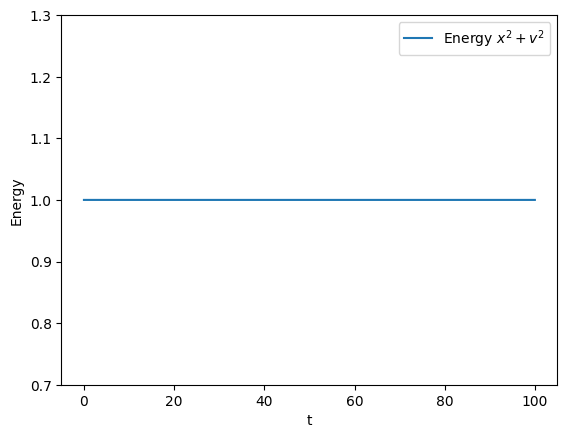

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


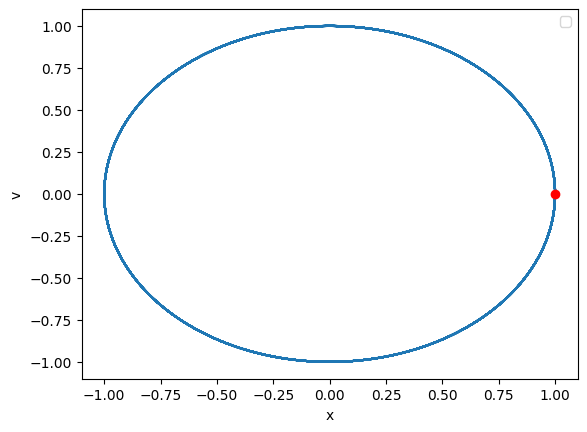

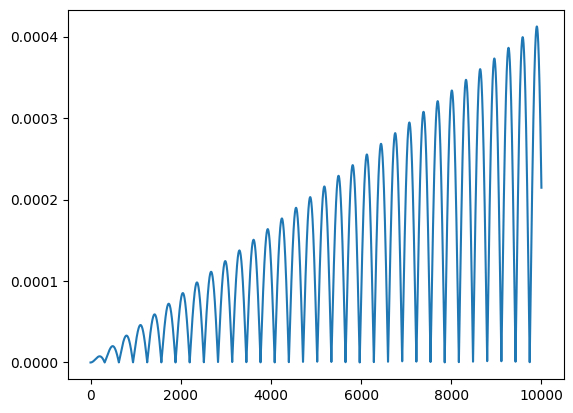

In [9]:
k = 1 
m = 1
x0 = 1 # initial positon
v0 = 0 # initial velocity

tau = np.sqrt(k/m)  # time scale of the problem =1/omega
omega = 1/tau

dt  = tau/100 # grid size
T = 100*tau # domain size
t = np.arange(0, T , dt)

x = np.zeros(len(t))
x[0] = x0
v = np.zeros(len(t))
v[0] = v0

###EUler 
for i in range(len(t)-1):
    dxdt = v[i]
    xh = x[i] + dxdt*dt/2


    dvdt = -xh/tau**2
    
    # x[i+1] = xh + dxdt*dt/2
    v[i+1] = v[i] + dvdt*dt # euler's method

    x[i+1] = xh + v[i+1]*dt/2

def analytic(t):
    return x0*np.cos(omega*t)

# print(x)
energy = k*x**2+ v**2

plt.plot(t,x,label = 'x')
# plt.plot(t,v,label = 'v')
plt.plot(t,analytic(t),ls='--',label='analytic x')
plt.xlabel('t')
plt.legend()
plt.show()

plt.plot(t,energy,label='Energy $x^2 + v^2 $')
plt.xlabel('t')
plt.ylabel('Energy')

plt.ylim(0.7,1.3)
plt.legend()
plt.show()


plt.plot(x,v)
plt.plot(x[0],v[0],'ro')
plt.xlabel('x')
plt.ylabel('v')
plt.legend()
plt.show()

error = np.abs(x-analytic(t))
plt.plot(error,label='abs error')